<a href="https://colab.research.google.com/github/neda-nano/-binary-classification-of-Tumor-brain-MRI-scans/blob/main/brain_MRI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [2]:
normal = "/content/drive/MyDrive/tumor classification/brain_tumor_dataset/no"
unmormal = "/content/drive/MyDrive/tumor classification/brain_tumor_dataset/yes"

In [3]:
path_normal  = glob.glob(normal + "/*")
path_unmormal  =    glob.glob(unmormal + "/*")

In [4]:
len(path_normal) , len(path_unmormal)

(98, 155)

In [11]:
img_normal = cv2.imread(path_normal[11])
img_normal.shape

(198, 150, 3)

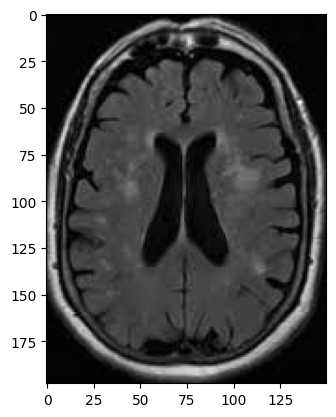

In [12]:
plt.imshow(img_normal)

In [26]:
img_unnormal = cv2.imread(path_unmormal[30])
img_unnormal.shape

(225, 225, 3)

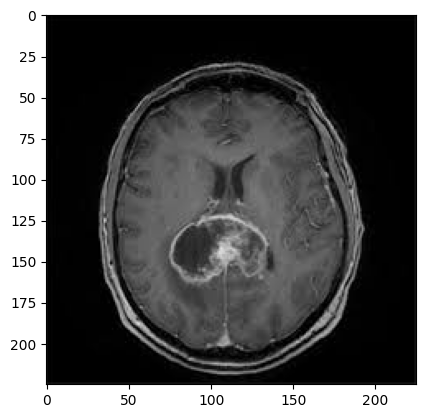

In [27]:
plt.imshow(img_unnormal)

In [ ]:
#label 0 is normal and 1 for unnormal
data = []
label = []

for path in path_normal:
    img = cv2.imread(path)
    img = cv2.resize(img , (224,224) , interpolation = cv2.INTER_NEAREST )
    img = img/(img.max())
    data.append(img)
    label.append(0)


for path in path_unmormal:
    img = cv2.imread(path)
    img = cv2.resize(img , (224,224) , interpolation = cv2.INTER_NEAREST )
    img = img/(img.max())
    data.append(img)
    label.append(1)


In [ ]:
np.save("/content/drive/MyDrive/tumor classification/brain_tumor_dataset/data.npy" , np.array(data) )
np.save("/content/drive/MyDrive/tumor classification/brain_tumor_dataset/label.npy" , np.array(label) )

#


In [ ]:
data = np.load("/content/drive/MyDrive/tumor classification/brain_tumor_dataset/data.npy")

label = np.load("/content/drive/MyDrive/tumor classification/brain_tumor_dataset/label.npy")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.2,random_state=123,stratify=label)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
np.unique(y_train , return_counts=True)

In [ ]:
np.unique(y_test , return_counts=True)

#model

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(kernel_size=(5,5), filters=32 , activation="relu" ,padding="same" ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32 , activation="relu" ,padding="same" ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32 , activation="relu" ,padding="same" ),
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32 , activation="relu" ,padding="same" ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64 , activation="relu" ,padding="same" ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128,activation = "relu"),
        tf.keras.layers.Dropout(rate = 0.5),
        tf.keras.layers.Dense(1, activation = "sigmoid" )

    ]
)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = "binary_crossentropy" ,
              metrics = ['accuracy'])

In [ ]:
H = model.fit(X_train,y_train , batch_size=8 , epochs= 10  , validation_data =(X_test,y_test) , verbose=2 , shuffle=True  )

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.72549, saving model to /content/drive/MyDrive/brain_MRI_CNN.keras
26/26 - 13s - 490ms/step - accuracy: 0.5891 - loss: 0.6896 - val_accuracy: 0.7255 - val_loss: 0.5426
Epoch 2/10

Epoch 2: val_accuracy improved from 0.72549 to 0.86275, saving model to /content/drive/MyDrive/brain_MRI_CNN.keras
26/26 - 10s - 403ms/step - accuracy: 0.7178 - loss: 0.6000 - val_accuracy: 0.8627 - val_loss: 0.3263
Epoch 3/10

Epoch 3: val_accuracy improved from 0.86275 to 0.88235, saving model to /content/drive/MyDrive/brain_MRI_CNN.keras
26/26 - 1s - 19ms/step - accuracy: 0.7277 - loss: 0.6269 - val_accuracy: 0.8824 - val_loss: 0.3601
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.88235
26/26 - 1s - 20ms/step - accuracy: 0.7871 - loss: 0.5144 - val_accuracy: 0.8824 - val_loss: 0.3223
Epoch 5/10

Epoch 5: val_accuracy improved from 0.88235 to 0.90196, saving model to /content/drive/MyDrive/brain_MRI_CNN.keras
26/26 - 1s - 28ms/step - accurac